In [1]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from PIL import Image
from encoding_utils.voxelizer import BEVVoxelizer
import sf_demo_utils as sf

In [2]:
seq_num = '0084'

seq_dir = '/home/yahyaalaa/Yahya/KITTI_full_sequences/2011_09_26_drive_{}_sync/2011_09_26_drive_{}_sync'
seq_dir = seq_dir.format(seq_num, seq_num)

dirs = sf.define_data_dir(seq_dir)

dataset_ids = sf.get_dataset_ids(seq_dir, dirs['rgb_dir'])

In [3]:
voxelizer = sf.get_preprocess_fn()
target_encoder, nms = sf.get_postprocess_fn()

In [9]:
sensor_fusion_model = sf.get_sensor_fusion_model(trainable=False);

In [5]:
test_id = 3
cur_timestamp, seq_dir = dataset_ids[test_id][0], dataset_ids[test_id][1]

calib_data = sf.get_calib_data(data_dirs=dirs)
input_data = sf.get_input_data(ts=cur_timestamp,
                               calib_data=calib_data,
                               data_dirs=dirs,
                               voxelizer=voxelizer)

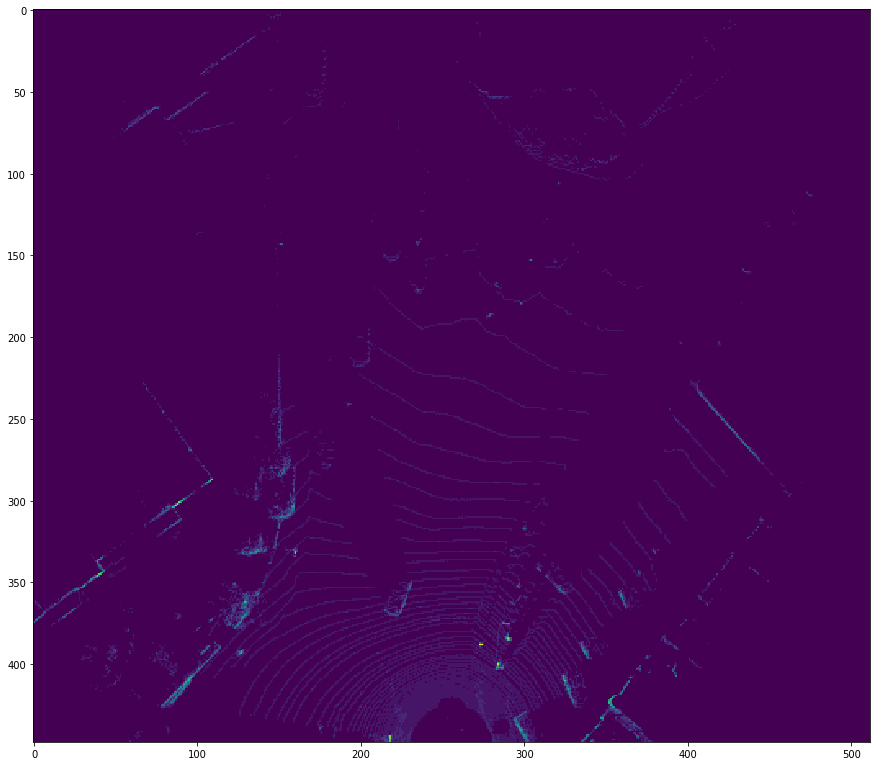

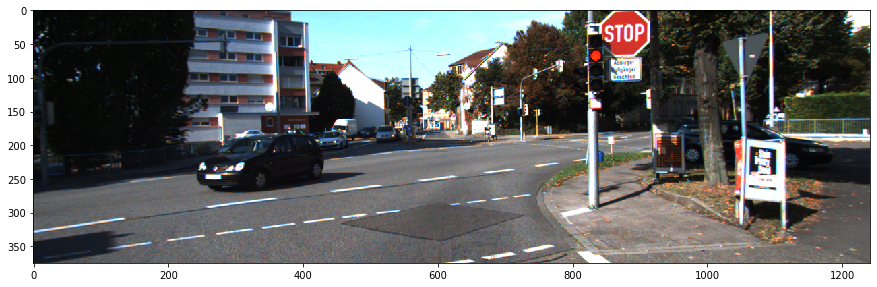

In [6]:
img = sf.get_image_from_data(input_data)
bev = sf.get_bev_from_data(input_data)

plt.figure(figsize = (15, 15))
plt.imshow(np.squeeze(bev))

plt.figure(figsize = (15, 15))
plt.imshow(np.squeeze(img))

In [7]:
boxes = sf.inference(sensor_fusion_model, input_data, target_encoder, nms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


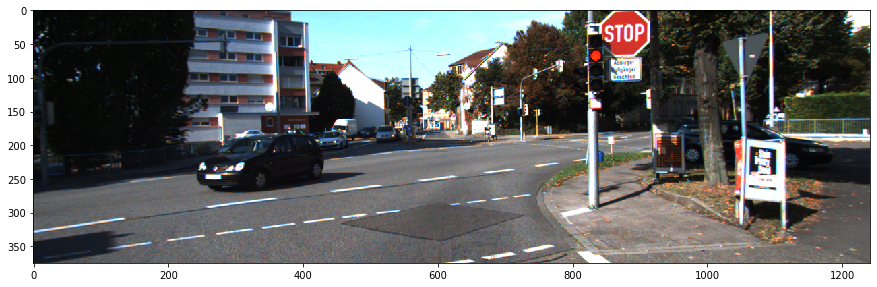

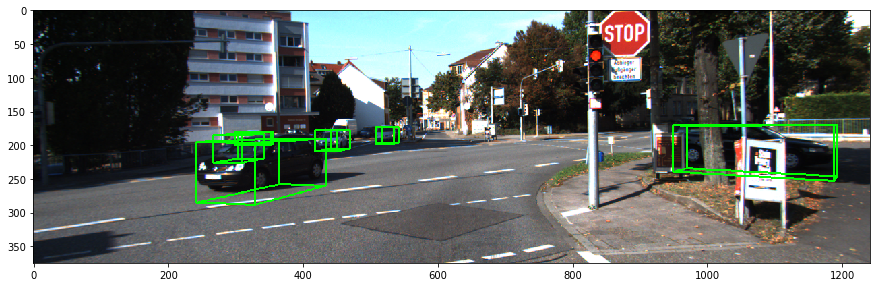

In [8]:
rv = sf.range_view(np.squeeze(img), calib_data['P2'], boxes)

plt.figure(figsize = (15, 15))
plt.imshow(np.squeeze(img))

plt.figure(figsize = (15, 15))
plt.imshow(np.squeeze(rv))